In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress, pearsonr
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
player_shooting = pd.read_csv('players/player_premier_league_shooting.csv')
player_shooting = player_shooting.drop(columns=['Unnamed: 0'])
player_shooting.index = player_shooting.index + 1
player_shooting.head()

,Player,Nation,Pos,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
1,Brenden Aaronson,us USA,"MF,FW",Leeds United,21,26.4,1,41,9,22.0,...,0.34,0.02,0.11,0,0,3.9,3.9,0.09,-2.9,-2.9
2,George Abbott,eng ENG,MF,Tottenham,16,0.0,0,0,0,NaN,...,0.00,NaN,NaN,0,0,0.0,0.0,NaN,0.0,0.0
3,Che Adams,sct SCO,FW,Southampton,26,22.1,5,47,14,29.8,...,0.63,0.11,0.36,0,0,6.6,6.6,0.14,-1.6,-1.6
4,Tyler Adams,us USA,MF,Leeds United,23,24.0,0,4,0,0.0,...,0.00,0.00,NaN,0,0,0.1,0.1,0.03,-0.1,-0.1
5,Tosin Adarabioyo,eng ENG,DF,Fulham,24,23.2,1,16,4,25.0,...,0.17,0.06,0.25,0,0,0.7,0.7,0.04,0.3,0.3


In [3]:
player_shooting_top20 = player_shooting.sort_values('Tot_Shot', ascending=False).head(20).reset_index(drop=True)
player_shooting_top20.index = player_shooting_top20.index + 1
player_shooting_top20[['Player', 'Tot_Shot']]

,Player,Tot_Shot
1,Harry Kane,124
2,Mohamed Salah,121
3,Erling Haaland,116
4,Marcus Rashford,108
5,Martin Ødegaard,93
6,Bruno Fernandes,90
7,Ivan Toney,87
8,Bukayo Saka,86
9,Aleksandar Mitrović,85
10,Ollie Watkins,84


In [4]:
player_goals_top20 = player_shooting.sort_values('Goals', ascending=False).head(20).reset_index(drop=True)
player_goals_top20.index = player_goals_top20.index + 1
player_goals_top20[['Player', 'Goals']]

,Player,Goals
1,Erling Haaland,36
2,Harry Kane,30
3,Ivan Toney,20
4,Mohamed Salah,19
5,Callum Wilson,18
6,Marcus Rashford,17
7,Gabriel Martinelli,15
8,Ollie Watkins,15
9,Martin Ødegaard,15
10,Aleksandar Mitrović,14


In [5]:
player_shooting_top20['Squad'].describe()

count          20
unique         12
top       Arsenal
freq            4
Name: Squad, dtype: object

In [6]:
player_goals_top20['Squad'].describe()

count          20
unique         13
top       Arsenal
freq            4
Name: Squad, dtype: object

In [7]:
player_shooting_top20['Squad'].value_counts()

Squad
Arsenal            4
Manchester Utd     3
Tottenham          2
Liverpool          2
Brighton           2
Manchester City    1
Brentford          1
Fulham             1
Aston Villa        1
Leicester City     1
Bournemouth        1
West Ham           1
Name: count, dtype: int64

In [8]:
player_goals_top20['Squad'].value_counts()

Squad
Arsenal            4
Manchester City    2
Liverpool          2
Newcastle Utd      2
Leicester City     2
Tottenham          1
Brentford          1
Manchester Utd     1
Aston Villa        1
Fulham             1
Leeds United       1
Brighton           1
Nott'ham Forest    1
Name: count, dtype: int64

In [9]:
goal_eff = player_shooting_top20.sort_values('Goal/TotShot', ascending=False).reset_index()
goal_eff.index = goal_eff.index + 1
goal_eff[['Player', 'Squad', 'Goal/TotShot']]

,Player,Squad,Goal/TotShot
1,Erling Haaland,Manchester City,0.25
2,Harry Kane,Tottenham,0.20
3,Gabriel Martinelli,Arsenal,0.19
4,Ollie Watkins,Aston Villa,0.17
5,Marcus Rashford,Manchester Utd,0.16
6,Martin Ødegaard,Arsenal,0.16
7,Ivan Toney,Brentford,0.16
8,Bukayo Saka,Arsenal,0.14
9,Mohamed Salah,Liverpool,0.14
10,Gabriel Jesus,Arsenal,0.13


In [10]:
goal_xG = player_shooting_top20.sort_values('Goal-xG', ascending=False).reset_index()
goal_xG.index = goal_xG.index + 1
goal_xG[['Player', 'Squad', 'Goal-xG']].head(8)


,Player,Squad,Goal-xG
1,Harry Kane,Tottenham,8.5
2,Erling Haaland,Manchester City,7.6
3,Gabriel Martinelli,Arsenal,5.7
4,Martin Ødegaard,Arsenal,5.0
5,Bukayo Saka,Arsenal,2.8
6,Marcus Rashford,Manchester Utd,1.6
7,Ivan Toney,Brentford,1.3
8,James Maddison,Leicester City,1.3


In [11]:
goal_xG = player_shooting_top20.sort_values('Goal-xG', ascending=False).reset_index()
goal_xG.index = goal_xG.index + 1
goal_xG[['Player', 'Squad', 'Goal-xG']].tail(12)

,Player,Squad,Goal-xG
9,Son Heung-min,Tottenham,-0.1
10,Aleksandar Mitrović,Fulham,-0.9
11,Solly March,Brighton,-1.1
12,Bruno Fernandes,Manchester Utd,-1.3
13,Ollie Watkins,Aston Villa,-1.5
14,Alexis Mac Allister,Brighton,-2.1
15,Antony,Manchester Utd,-2.6
16,Mohamed Salah,Liverpool,-2.7
17,Jarrod Bowen,West Ham,-2.9
18,Gabriel Jesus,Arsenal,-3.0


In [12]:
goal_xG = player_goals_top20.sort_values('Goal-xG', ascending=False).reset_index()
goal_xG.index = goal_xG.index + 1
goal_xG[['Player', 'Squad', 'Goal-xG']]

,Player,Squad,Goal-xG
1,Harry Kane,Tottenham,8.5
2,Erling Haaland,Manchester City,7.6
3,Gabriel Martinelli,Arsenal,5.7
4,Roberto Firmino,Liverpool,5.5
5,Phil Foden,Manchester City,5.1
6,Martin Ødegaard,Arsenal,5.0
7,Rodrigo,Leeds United,4.9
8,Harvey Barnes,Leicester City,4.1
9,Taiwo Awoniyi,Nott'ham Forest,3.4
10,Miguel Almirón,Newcastle Utd,3.0


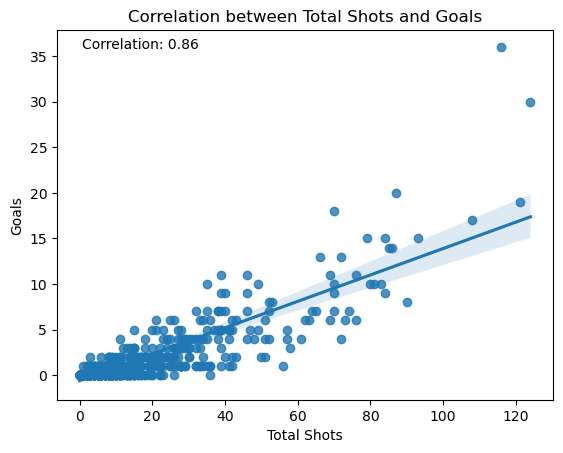

In [13]:
# Calculate the correlation
correlation = player_shooting['Tot_Shot'].corr(player_shooting['Goals'])

# Plot the regression line with scatterplot
sns.regplot(x='Tot_Shot', y='Goals', data=player_shooting)

# Add labels and title
plt.xlabel('Total Shots')
plt.ylabel('Goals')
plt.title('Correlation between Total Shots and Goals')

# Add correlation text to the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()



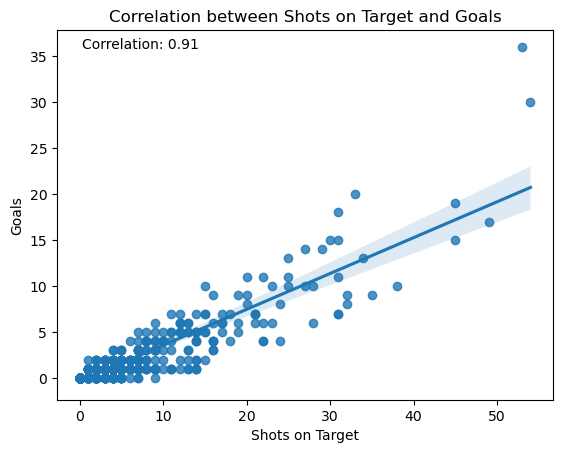

In [14]:

# Calculate the correlation
correlation = player_shooting['Shot_On_Target'].corr(player_shooting['Goals'])

# Plot the regression line with scatterplot
sns.regplot(x='Shot_On_Target', y='Goals', data=player_shooting)

# Add labels and title
plt.xlabel('Shots on Target')
plt.ylabel('Goals')
plt.title('Correlation between Shots on Target and Goals')

# Add correlation text to the plot
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

# Show the plot
plt.show()


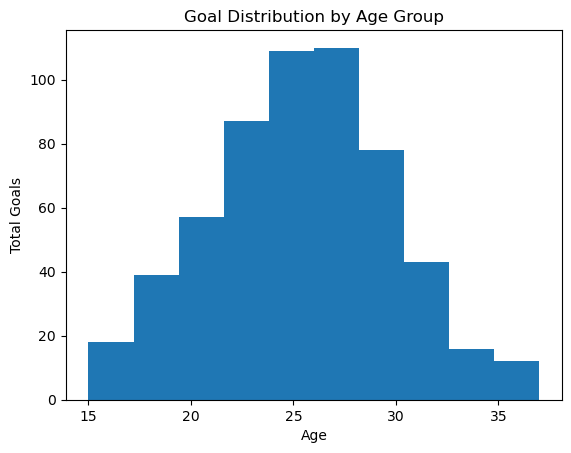

In [15]:
Age_group=player_shooting.groupby(by='Age')['Goals'].sum().reset_index() #shouout okoli 
Age_group.rename(columns={'Goals':'Total Goals'},inplace=True)
age_dist = plt.hist(player_shooting['Age'])
# ... previous code ...

plt.xlabel('Age')
plt.ylabel('Total Goals')
plt.title('Goal Distribution by Age Group')

plt.show()

